<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Data Visualization

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math

In [ ]:
iris = datasets.load_iris()
print(iris.DESCR)

In [ ]:
iris.data
iris.target

In [ ]:
# Select all rows and only first two columns (sepal length/width)
X = iris.data[:, :2]
# Target will be used to plot samples in different colors for different species
Y = iris.target
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal size distribution')

Text(0.5, 1.0, 'Sepal size distribution')

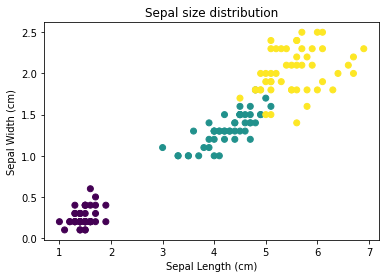

In [ ]:
# Select all rows and only colums 2 to 4 (petal length/width)
Z = iris.data[:,2:4]
# Target will be used to plot samples in different colors for different species
Y = iris.target
plt.scatter(Z[:,0], Z[:,1], c=Y)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal size distribution')


# Sigmoid Activation Function

In [ ]:
def sigmoid(z):
  return 1/(1+math.exp(-z))

## Cost function

In [ ]:
def loss(y_train, y_predicted):
  return -(y_train * math.log(y_predicted) + (1.0 - y_train) * math.log(1 - y_predicted))

# Prediction Function

In [23]:
def predic(sample):
  result = 0
  for i in range(len(sample)):
    result = result + weights[i]*sample[i]

  result = result + bias
  return sigmoid(result)

## Back Propagation

In [22]:
num_features = iris.data.shape[1]

def train_one_epoch(x_train_samples, y_train_samples):
  cost = 0
  dw = [0]*num_features
  db = 0

  global bias, weights

  m=len(x_train_samples)
  for i in range(m):
    x_sample = x_train_samples[i]
    y_sample = y_train_samples[i]
    predicted = predict(x_sample)
    cost = cost + loss(y_sample,predicted)

    dz = predicted - y_train_samples

    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j]*dz
    db = db + dz
  
  cost = cost /m
  db = db /m
  bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = weights[j] - learning_rate*dw[j]
  
  return cost